In [18]:
#importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import matplotlib.colors
import pandas as pd
import matplotlib.font_manager

%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.max_columns = 50
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
#load the data
file_dir = os.path.join('C:/Users/shrut/Desktop/Fall 2020/MET CS Data Science with Python/Datascience_project/Datasets')

#historical visit data for the air restaurants. 
#main training data set.
AIR_VISIT_DATA = os.path.join(file_dir, 'air_visit_data.csv')
air_visit_data = pd.read_csv(AIR_VISIT_DATA)

#reservations made through air
AIR_RESERVE = os.path.join(file_dir, 'air_reserve.csv')
air_reserve = pd.read_csv(AIR_RESERVE)

#details about the air restaurants including location and genre.
AIR_STORE_INFO = os.path.join(file_dir, 'air_store_info.csv') 
air_store_info = pd.read_csv(AIR_STORE_INFO)

#Japanese holidays
DATE_INFO = os.path.join(file_dir, 'date_info.csv') 
date_info = pd.read_csv(DATE_INFO).rename(columns={'calendar_date': 'visit_date'})

#reservations made through the hpg systems
HPG_RESERVE = os.path.join(file_dir, 'hpg_reserve.csv')
hpg_reserve = pd.read_csv(HPG_RESERVE)

#details about hpg restaurants including location and genre.
HPG_STORE_INFO = os.path.join(file_dir, 'hpg_store_info.csv')
hpg_store_info = pd.read_csv(HPG_STORE_INFO,  encoding = 'utf8')

#connects the air and hpg ids
STORE_ID_RELATION = os.path.join(file_dir, 'store_id_relation.csv')
store_id_relation = pd.read_csv(STORE_ID_RELATION)


In [23]:
#air_reserve.head()
air_visit_data.describe()
#air_store_info.head()
#date_info.head()
#hpg_reserve.head()   
#hpg_store_info.head()
#describe()
#store_id_relation.head() 

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Visitors')

No handles with labels found to put in legend.


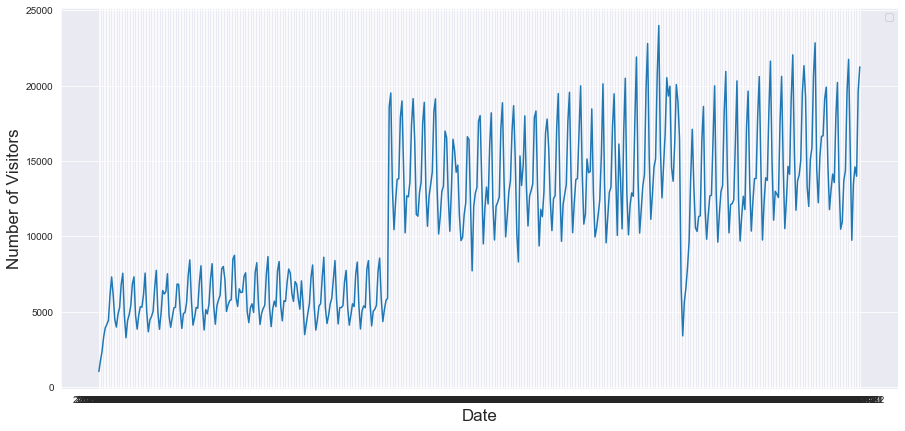

In [24]:
#%matplotlib inline
#number of visitors by air data per day
a = air_visit_data.groupby(air_visit_data['visit_date'])['visitors'].sum()
plt.figure(figsize=(15,7))
plt.plot(a.index, a)
plt.xlabel("Date", fontsize=17)
plt.ylabel("Number of Visitors",fontsize= 17)
plt.legend()
#THE CONTINUOUS FLUCTUATIONS CAN BE DUE TO FLUCTUATIONS BETWEEN THE WEEKEND AND WEEKDAYS. IT SEEMS LIKE WITH MORE NUMBER OF RESTAURANTS ASSOCIATED WITH AIR,THE NUMBER OF VISITORS INCREASES WITH TIME

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Visitors')

No handles with labels found to put in legend.


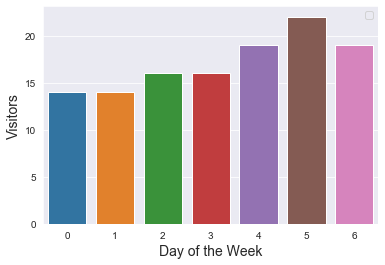

In [30]:
#median visitors per week:
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])
air_visit_data['day_of_week'] = air_visit_data['visit_date'].dt.dayofweek
b = air_visit_data.groupby(['day_of_week'])['visitors'].median()
sns.barplot(x=b.index, y=b)

plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Visitors",fontsize= 14)
plt.legend()
#MOST PEOPLE VISIT RESTAURANTS ON THE WEEKEND(FRIDAY, SATURDAY AND SUNDAY)

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Visitors')

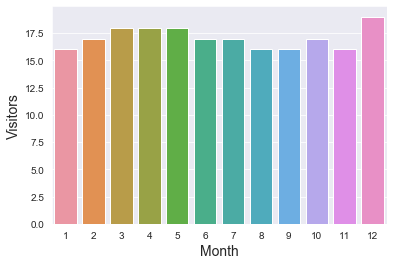

In [31]:
#median visitors per month of the year:
air_visit_data['month'] = air_visit_data['visit_date'].dt.month
c = air_visit_data.groupby(['month'])['visitors'].median()
sns.barplot(x=c.index, y=c)

plt.xlabel("Month", fontsize=14)
plt.ylabel("Visitors",fontsize= 14)
#DECEMBER MONTH HAS MAXIMUM VISITORS IN THE RESTAURANTS

<Figure size 864x288 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Visitors')

No handles with labels found to put in legend.


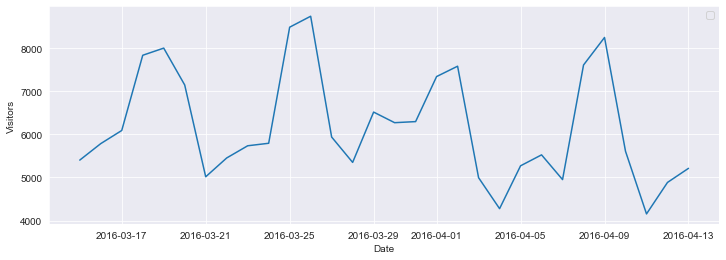

In [32]:
#%matplotlib qt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#plot of the number of vivitors in the month of March - April
df = air_visit_data[((air_visit_data['visit_date'] > '2016-03-14') & (air_visit_data['visit_date'] < '2016-04-14'))]
df1 = df.groupby(df['visit_date'])['visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(df1.index,df1)
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend()

<Figure size 864x288 with 0 Axes>

Text(0.5, 0, 'Visit_Date')

Text(0, 0.5, 'Visitors')

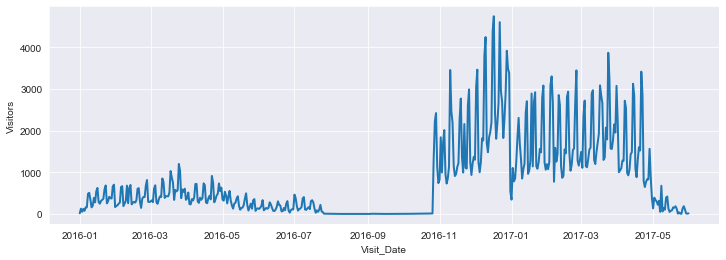

In [33]:
#%matplotlib qt
#number of visitors v/s date of visit
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_hour'] = air_reserve['visit_datetime'].dt.hour
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date

air_reserve_date = air_reserve.groupby(['visit_date'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(air_reserve_date.index,air_reserve_date,lw = 2)
plt.xlabel("Visit_Date")
plt.ylabel("Visitors")

<Figure size 864x288 with 0 Axes>

<BarContainer object of 24 artists>

Text(0.5, 0, 'Visit_hour')

Text(0, 0.5, 'Visitors')

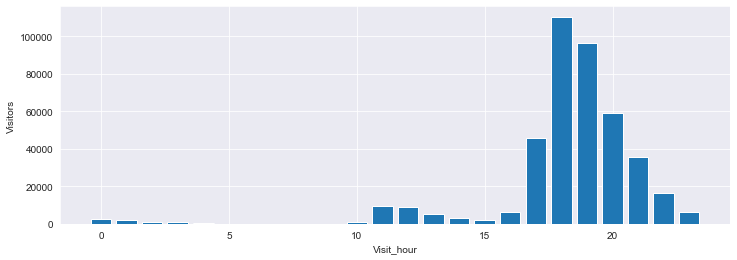

In [34]:
#plot of time of visit v/s number of visitors
air_reserve_hour = air_reserve.groupby(['visit_hour'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.bar(air_reserve_hour.index,air_reserve_hour)
plt.xlabel("Visit_hour")
plt.ylabel("Visitors")
#MOST PEOPLE VISIT THE RESATURANTS DURING EVENINGS (FOR DINNER)

<Figure size 864x288 with 0 Axes>

<BarContainer object of 92378 artists>

Text(0.5, 0, 'Time from reservation to visit (hours) ')

Text(0, 0.5, 'Visitors')

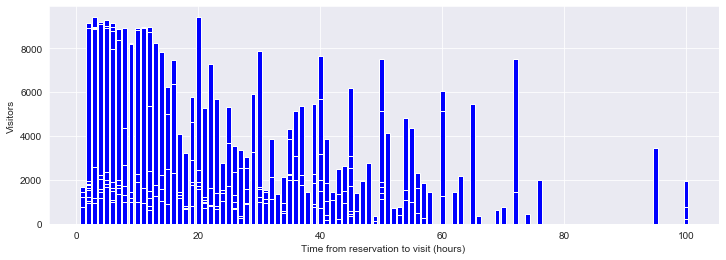

In [37]:
#%matplotlib inline
#Time from reservation to visit time to the restaurant
air_reserve['delta'] = air_reserve['visit_datetime']-air_reserve['reserve_datetime']
air_reserve['delta1'] = air_reserve['delta'].apply(lambda x: (x.total_seconds()/3600))
plt.figure(figsize=(12,4))
#plt.figure(figsize=(8, 8))
plt.bar(air_reserve.reserve_visitors,air_reserve.delta1, color='blue')
plt.xlabel("Time from reservation to visit (hours) ")
plt.ylabel("Visitors")
#PEOPLE USUALLY VISIT AFTER A FEW HOURS OF THE RESERVATION, VERY FEW PEOPLE RESERVE 2 DAYS OR MORE DAYS AHEAD OF THEIR VISIT 

In [38]:
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime'] = pd.to_datetime(hpg_reserve['reserve_datetime'])
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].dt.hour
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].dt.date

<Figure size 864x288 with 0 Axes>

Text(0.5, 0, 'Visit_Date')

Text(0, 0.5, 'Visitors')

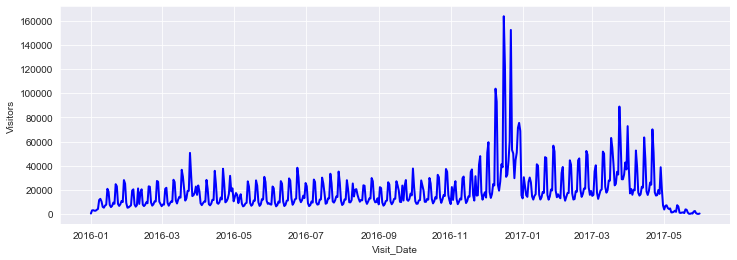

In [17]:
#number of visitors v/s date of visit
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
hpg_reserve_date = hpg_reserve.groupby(['visit_date'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(hpg_reserve_date.index,hpg_reserve_date,lw = 2, color = 'b')
plt.xlabel("Visit_Date")
plt.ylabel("Visitors")
#THE CONTINUOUS FLUCTUATIONS CAN BE DUE TO FLUCTUATIONS BETWEEN THE WEEKEND AND WEEKDAYS

<Figure size 864x288 with 0 Axes>

<BarContainer object of 24 artists>

Text(0.5, 0, 'Visit_hour')

Text(0, 0.5, 'Visitors')

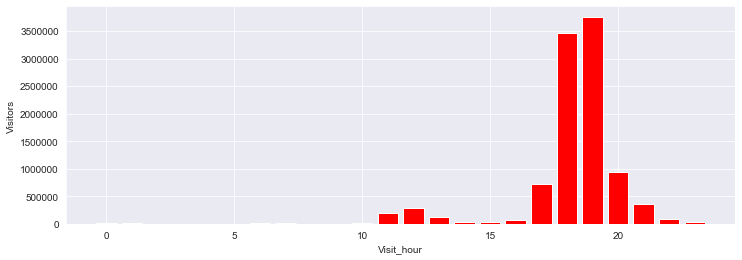

In [13]:
#plot of time of visit v/s number of visitors
hpg_reserve_hour = hpg_reserve.groupby(['visit_hour'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.bar(hpg_reserve_hour.index,hpg_reserve_hour, color = 'r')
plt.xlabel("Visit_hour")
plt.ylabel("Visitors")
#MOST PEOPLE VISIT THE RESATURANTS DURING EVENINGS (FOR DINNER)

<Figure size 864x288 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102],
 <a list of 103 Text xticklabel objects>)

Text(0.5, 0, 'Area')

Text(0, 0.5, 'Genre')

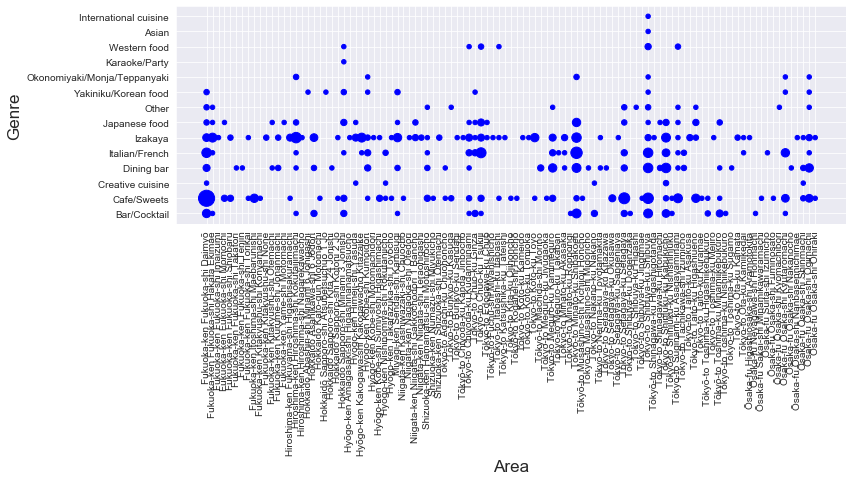

In [14]:
#%matplotlib qt
#Genres v/s area of the restaurant (with size = frequency of the genre in that area)
plt.figure(figsize=(12,4))
air_freq= air_store_info.groupby(['air_area_name','air_genre_name'])['air_genre_name'].count().reset_index(name='frequency')
plt.scatter(air_freq.air_area_name,air_freq.air_genre_name, label='stars', color='blue', marker='o', s= air_freq.frequency * 10)
plt.xticks(rotation=90)
plt.xlabel("Area",fontsize=17)
plt.ylabel("Genre",fontsize=17)

<Figure size 432x432 with 0 Axes>

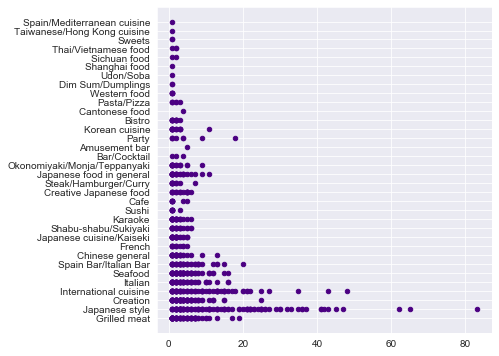

In [16]:
#%matplotlib inline
#Frequency of cuisine (hpg) 
plt.figure(figsize=(6,6))
hpg= hpg_store_info.groupby(['hpg_area_name','hpg_genre_name'])['hpg_genre_name'].count().reset_index(name='frequency')
#hpg.tail()
plt.scatter(hpg.frequency,hpg.hpg_genre_name, label='stars', color='indigo', marker='o', s=20) 